In [310]:
import os
import sys

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import seaborn as sns

from transformers import PreTrainedTokenizerFast

sys.path.append(os.path.abspath("../src"))
from utils import (
    load_flores_dataset,
)

In [311]:
TOKENIZER_MODELS = ["BPE", "WordPiece", "Unigram"]
VOCAB_SIZES = [10000, 20000, 30000, 40000]
LANGUAGES = ["es", "tr"]
EVAL_DATASETS = ["flores", "massive"]



results_path = "../results/"

### Fertility

Dataset: FLORES


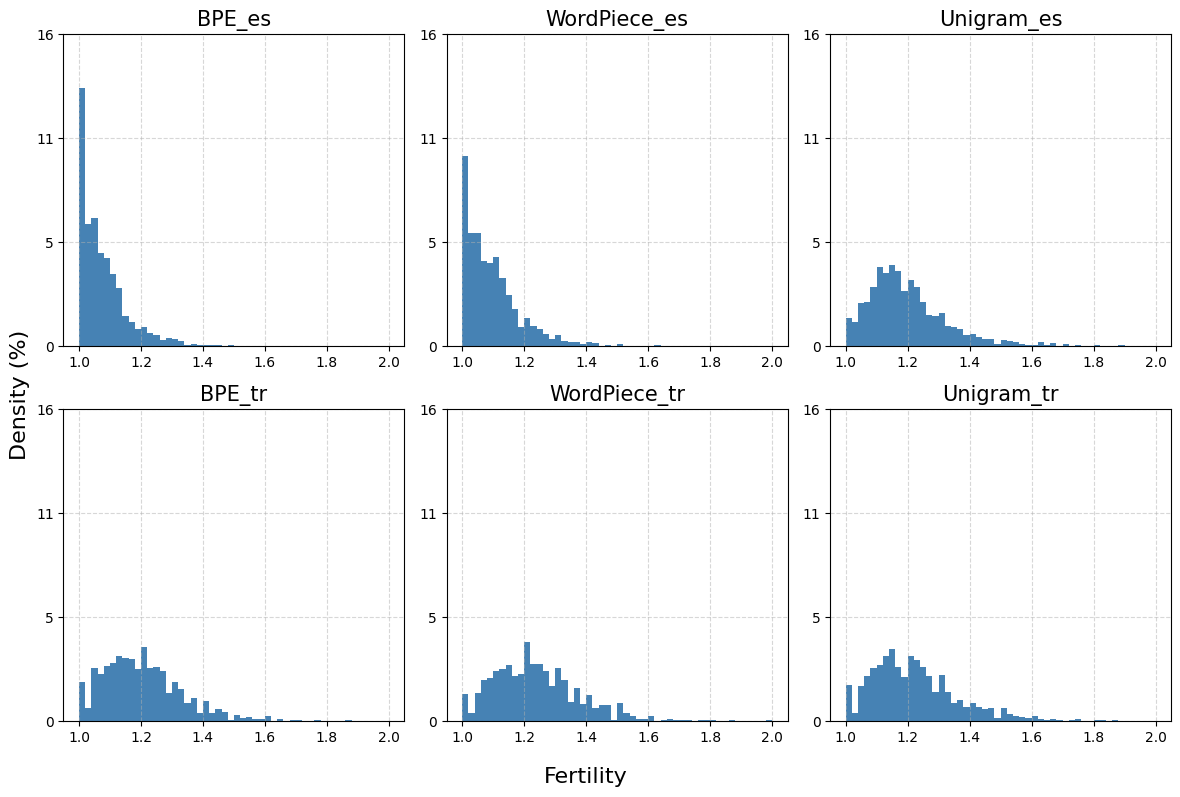

Dataset: MASSIVE


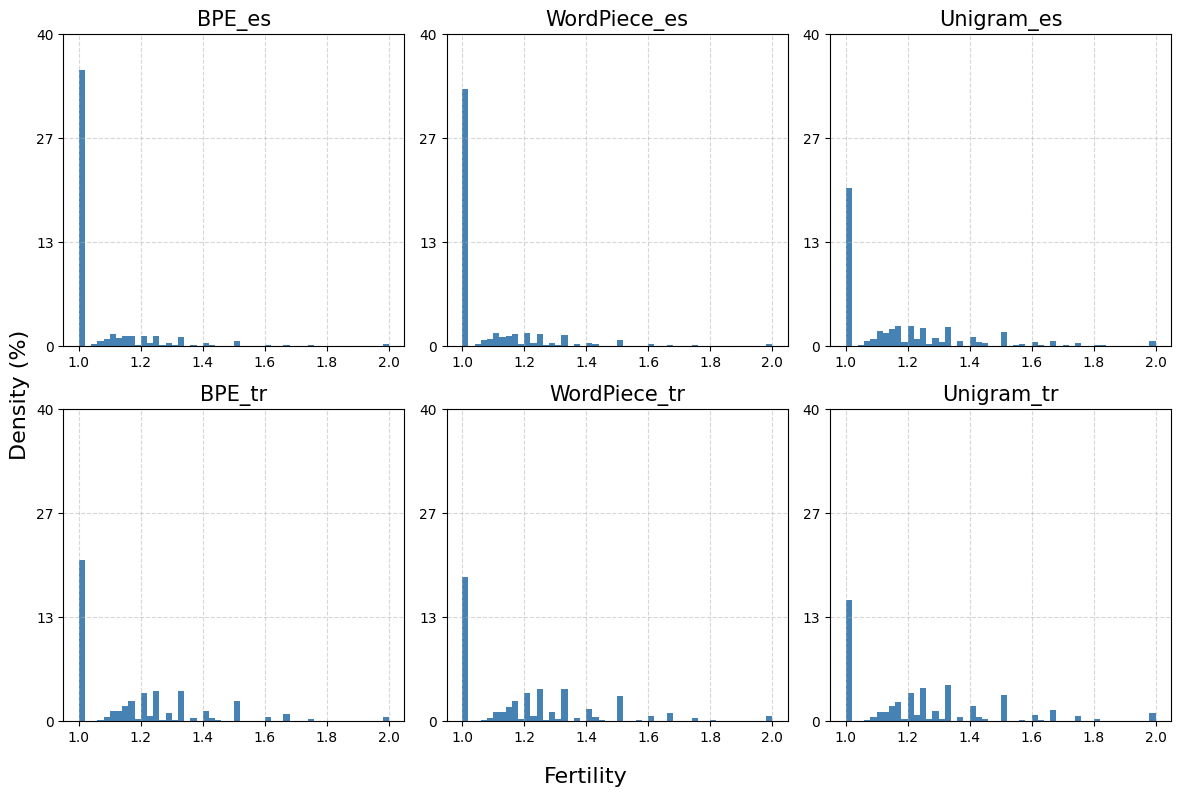

In [53]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  
    for i, language in enumerate(LANGUAGES):
        for j, model_name in enumerate(TOKENIZER_MODELS):
            results_fertility_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/eval_metrics_{dataset_name}.json')
            with open(results_fertility_path) as f:
                results_dict = json.load(f)

            # Plot a histogram with proportions
            axes[i][j].hist(results_dict['fertility'], bins=50, range=(1, 2), density=True, color='steelblue')
            axes[i][j].set_title(f"{model_name}_{language}", fontsize=15)
            axes[i][j].grid(True, linestyle='--', alpha=0.5)
            
            if dataset_name == "flores":
                y_min, y_max = (0, 16)
                axes[i][j].set_ylim(0, 0.16)
            else:
                y_min, y_max = (0, 40)
                axes[i][j].set_ylim(0, 0.4)
            y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
            axes[i][j].set_yticks(y_ticks)  # Set the ticks
            axes[i][j].set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels  

            # Add shared x and y-axis labels
            fig.supxlabel('Fertility', fontsize=16)
            fig.supylabel('Density (%)', fontsize=16)

    plt.tight_layout()
    # Save the figure as an SVG file
    plt.savefig(f'../figures/fertility_{dataset_name}.svg')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    plt.close()

### Parity

Dataset: FLORES
BPE gave the highest parity of 2.36 with index 1820
WordPiece gave the highest parity of 2.42 with index 963
Unigram gave the highest parity of 3.43 with index 236


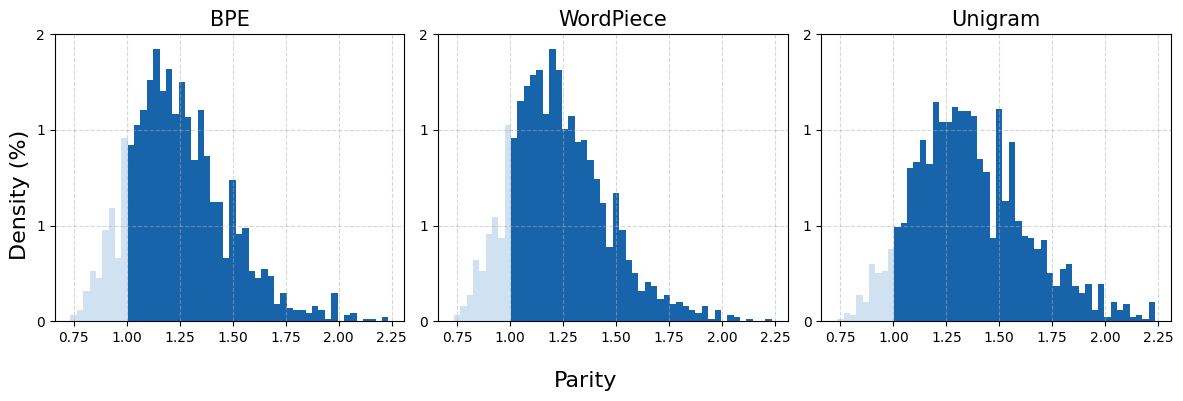

Dataset: MASSIVE
BPE gave the highest parity of 4.00 with index 6876
WordPiece gave the highest parity of 4.00 with index 6876
Unigram gave the highest parity of 7.00 with index 15083


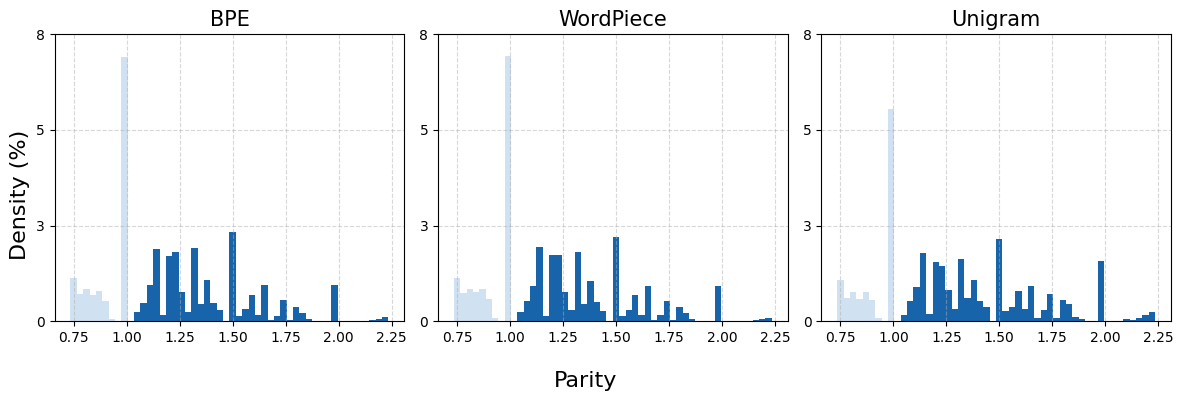

In [55]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes = axes.flatten()
    for i, model_name in enumerate(TOKENIZER_MODELS):
        results_parity_path = os.path.join(results_path, f'tr_{model_name}_vs40000/parity_{dataset_name}.json')
        with open(results_parity_path) as f:
            results_dict = json.load(f)

        # Track the data point with the highest parity
        max_parity = max(results_dict['parity'])
        idx = np.argmax(results_dict['parity'])
        print(f'{model_name} gave the highest parity of {max_parity:.2f} with index {idx}')
        
        # Calculate histogram data
        bin_edges = np.linspace(0.75, 2.25, 50 + 1)
        counts, edges = np.histogram(results_dict['parity'], bins=bin_edges, density=True)

        # Assign colors: lightblue for bins < 1, steelblue otherwise
        cmap = plt.get_cmap('Blues')
        color1, color2 = cmap(0.2), cmap(0.8)    
        colors = [color1 if (edge < 1) else color2 for edge in edges[:-1]]

        # Plot the histogram using bar to allow custom colors
        axes[i].bar(edges[:-1], counts, width=0.03, color=colors)
        axes[i].set_title(f"{model_name}", fontsize=15)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        
        if dataset_name == "flores":
            ymin, y_max = 0, 2.2
        else:
            ymin, y_max = 0, 8
        axes[i].set_ylim(ymin, y_max)
        
        # Generate and set y-axis ticks
        y_ticks = np.linspace(ymin, y_max, 4)  # Generate 4 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set the ticks
        axes[i].set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels  

        # Add shared x and y-axis labels
        fig.supxlabel('Parity', fontsize=16)
        fig.supylabel('Density (%)', fontsize=16)

    plt.tight_layout()
    # Save the figure as an SVG file
    plt.savefig(f'../figures/parity_{dataset_name}.svg')
    
    plt.show()


In [209]:
flores_es = load_flores_dataset('es')
flores_tr = load_flores_dataset('tr')

text_es = flores_es['text'][236]
text_tr = flores_tr['text'][236]

print('\n')
print(f'Spanish text: {text_es}')
print(f'Turkish text: {text_tr}')

Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).
Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).




Spanish text: se comportará igual que el agua. es transparente, tal como lo es el agua.
Turkish text: suya benzer şekilde saydam davranış sergileyecek.


### Productivity

Dataset: FLORES


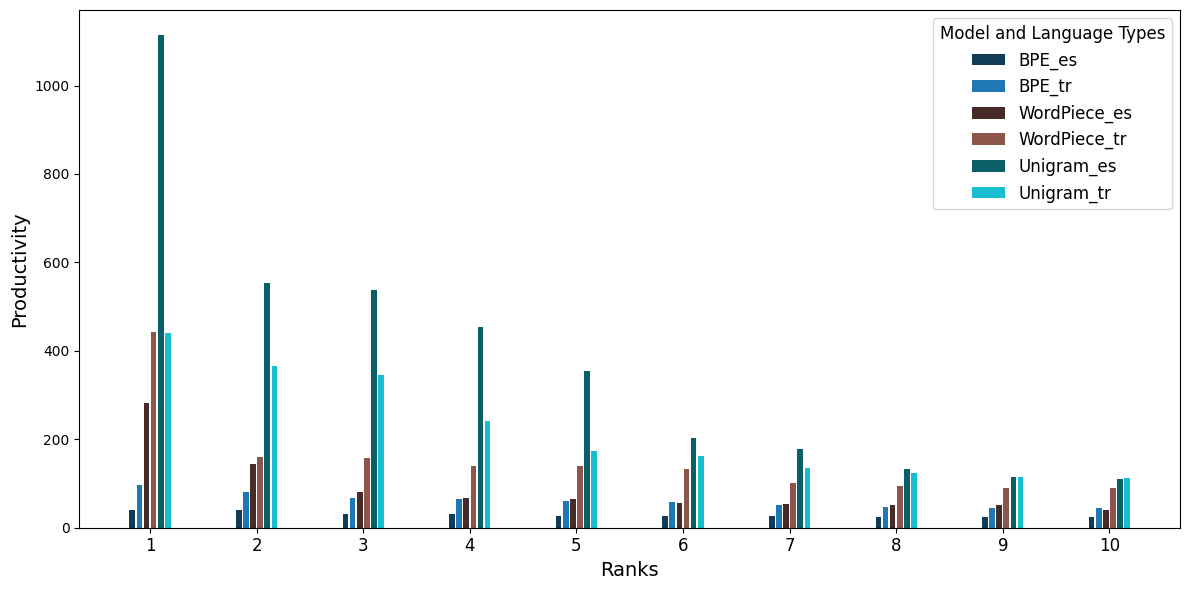

Dataset: MASSIVE


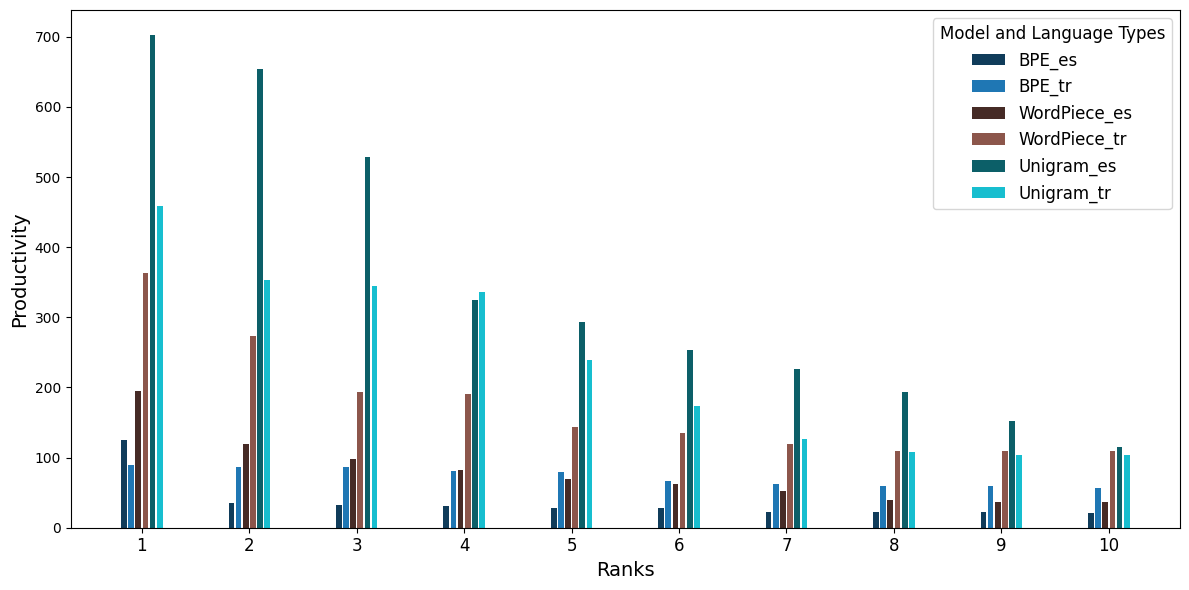

In [3]:
language_shades = {'tr': 1, 'es': 0.5}
colors = plt.cm.tab10(np.linspace(0, 1, len(TOKENIZER_MODELS)))
model_colors = {model_name: color for model_name, color in zip(TOKENIZER_MODELS, colors)}

color_dict = {}
for model_name in TOKENIZER_MODELS:
    for language in LANGUAGES:
        shade = language_shades[language]
        color = mcolors.to_rgb(model_colors[model_name])
        adjusted_color = tuple([c * shade for c in color])

        color_dict[(language, model_name)] = adjusted_color

ranks = np.arange(1, 11)  # Rankings from 1 to 10
bar_width = 0.2 / len(TOKENIZER_MODELS)

for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))
    for i, (language, model_name) in enumerate(color_dict.keys()):
        results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/productivity_{dataset_name}.json')
        with open(results_productivity_path) as f:
            results_dict = json.load(f)
        
        top10_values = sorted(results_dict.values(), reverse=True)[:10]

        plt.bar(ranks-0.1 + i * bar_width, top10_values, width=bar_width*0.8, 
            label=f'{model_name}_{language}', color=color_dict[(language, model_name)])

    plt.xlabel('Ranks', fontsize=14)
    plt.ylabel('Productivity', fontsize=14)

    plt.xticks(ranks + bar_width * (len(TOKENIZER_MODELS) - 1) / 2, ranks, fontsize=12)

    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]

    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper right', fontsize=12, title_fontsize=12)

    plt.tight_layout()

    # Save the figure as an SVG file
    plt.savefig(f'../figures/productivity_rank_{dataset_name}.svg')
    plt.show()

Dataset: FLORES


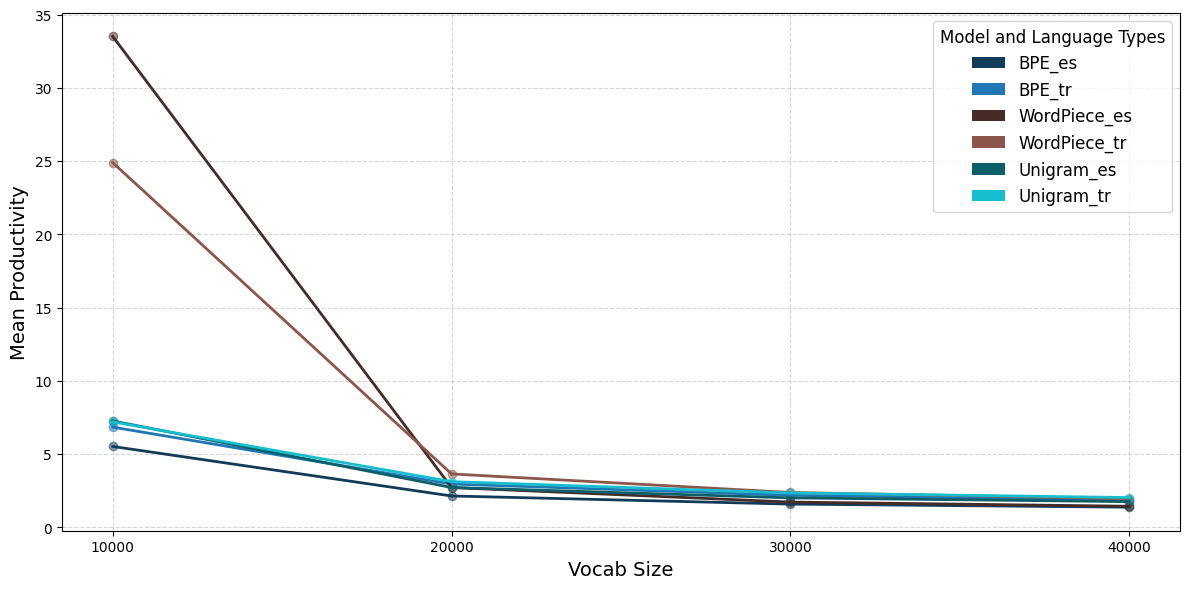

Dataset: MASSIVE


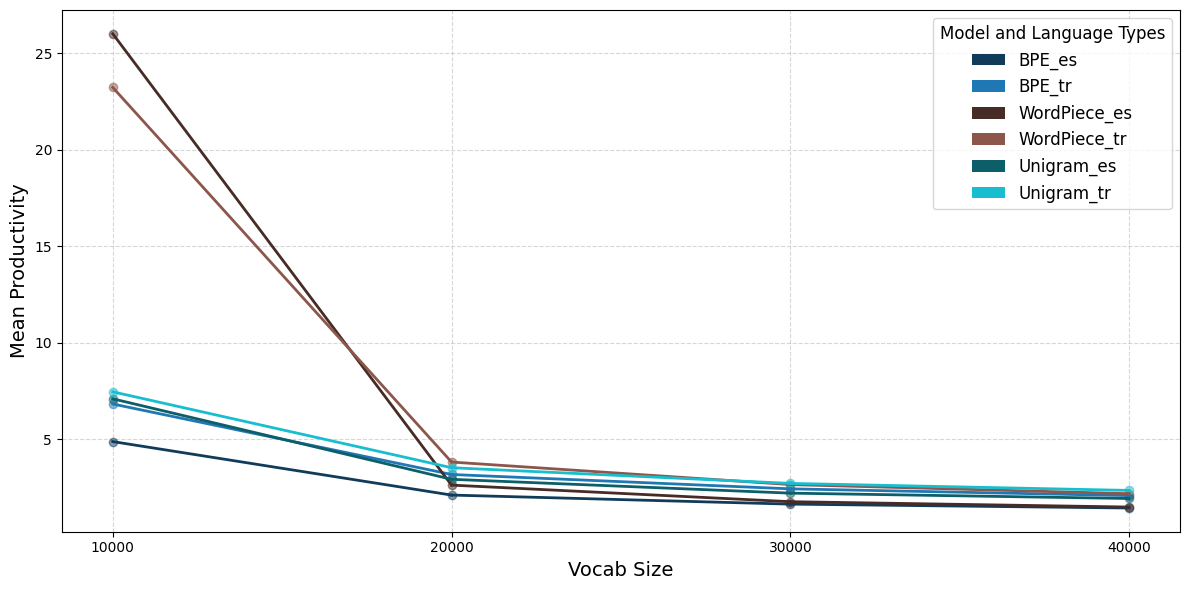

In [5]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))

    productivity_dict = {}
    for (language, model_name) in color_dict.keys():
        productivity_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/productivity_{dataset_name}.json')
            with open(results_productivity_path) as f:
                results_dict = json.load(f)

            avg_productivity = sum(results_dict.values())/len(results_dict)
            productivity_dict[(language, model_name)].append(avg_productivity)
            
            plt.plot(
            vocab_size,
            avg_productivity,
            label=f'{model_name}_{language}',
            color=color_dict[(language, model_name)],
            marker='o',
            alpha=0.5
            )

    for (language, model_name) in color_dict.keys():
        for i in range(3):
            plt.plot(
                    [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                    [productivity_dict[(language, model_name)][i], productivity_dict[(language, model_name)][i+1]],
                    color=color_dict[(language, model_name)],
                    linestyle='-',
                    linewidth=2,
                    )
    
    plt.xlabel('Vocab Size', fontsize=14)
    plt.ylabel('Mean Productivity', fontsize=14)
    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]
    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper right', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(VOCAB_SIZES)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()

    plt.savefig(f'../figures/avg_productivity_{dataset_name}.svg')
    plt.show()
            

### BPC & Perplexity

Dataset: FLORES


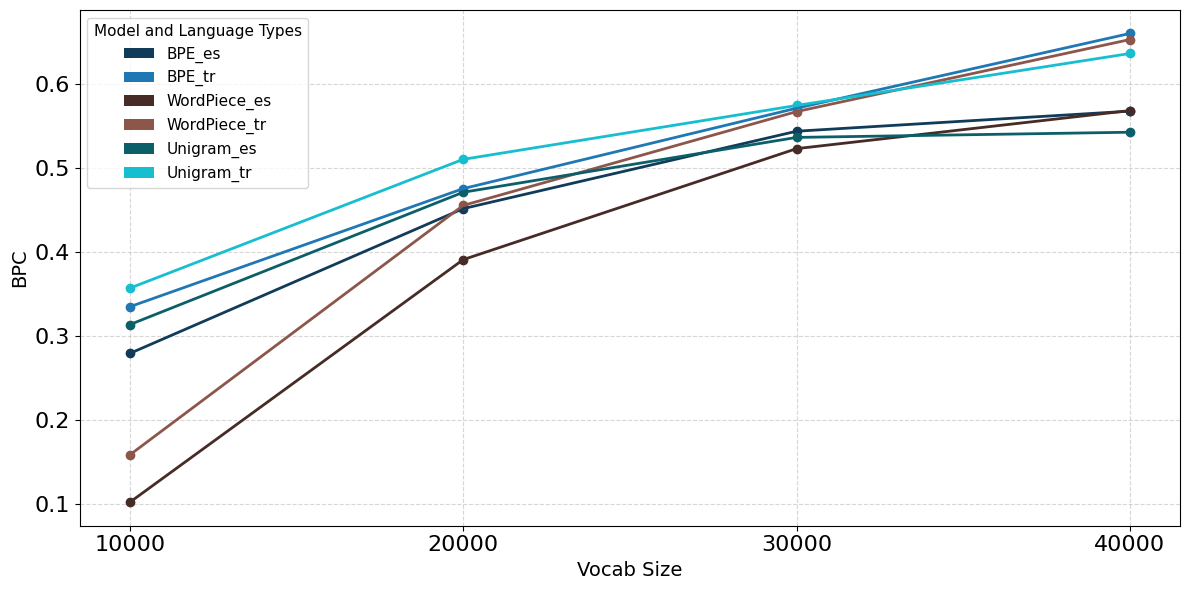

Dataset: MASSIVE


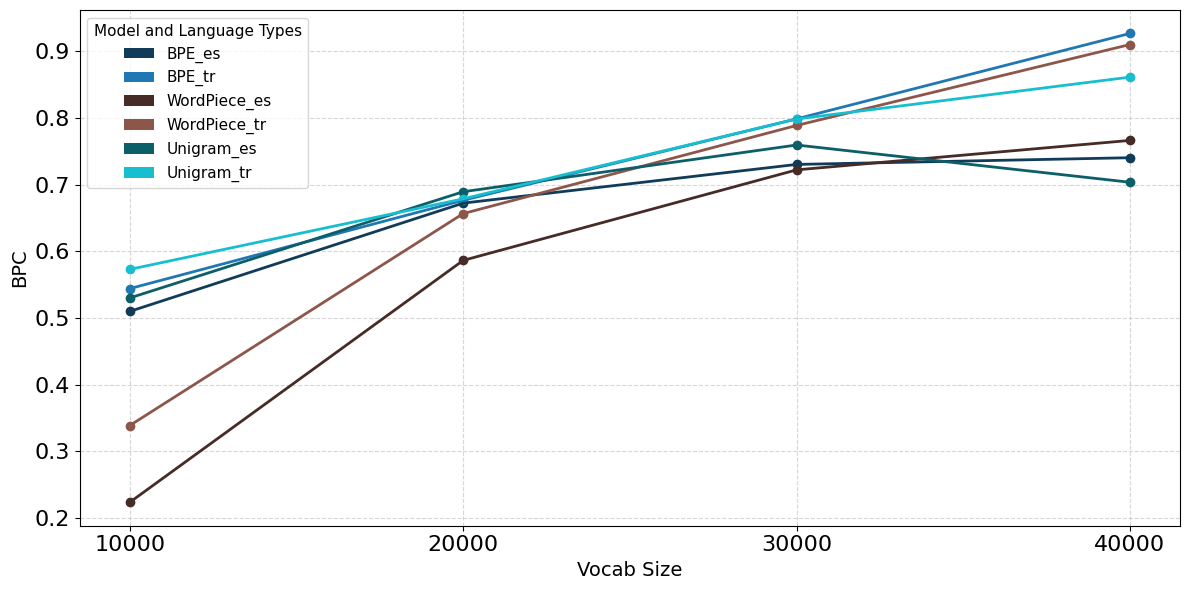

In [21]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))

    bpc_dict = {}
    for (language, model_name) in color_dict.keys():
        bpc_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_bpc_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/bpc_{dataset_name}.json')
            with open(results_bpc_path) as f:
                results_dict = json.load(f)

            bpc_dict[(language, model_name)].append(results_dict['bpc'])
            
            plt.plot(
            vocab_size,
            results_dict['bpc'],
            label=f'{model_name}_{language}',
            color=color_dict[(language, model_name)],
            marker='o',
            )

    for (language, model_name) in color_dict.keys():
        for i in range(3):
            plt.plot(
                    [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                    [bpc_dict[(language, model_name)][i], bpc_dict[(language, model_name)][i+1]],
                    color=color_dict[(language, model_name)],
                    linestyle='-',
                    linewidth=2,
                    )
    
    plt.xlabel('Vocab Size', fontsize=14)
    plt.ylabel('BPC', fontsize=14)
    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]
    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper left', fontsize=11, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.yticks(fontsize=16)
    plt.xticks(VOCAB_SIZES, fontsize=16)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()


    plt.savefig(f'../figures/bpc_{dataset_name}.svg')
    plt.show()
            

Dataset: FLORES


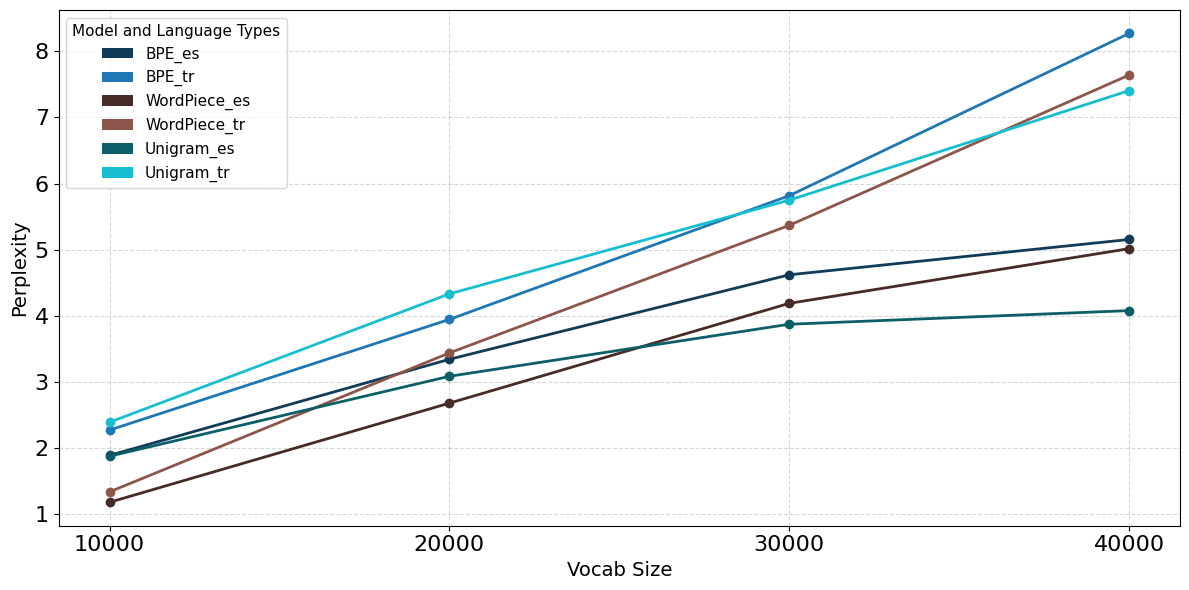

Dataset: MASSIVE


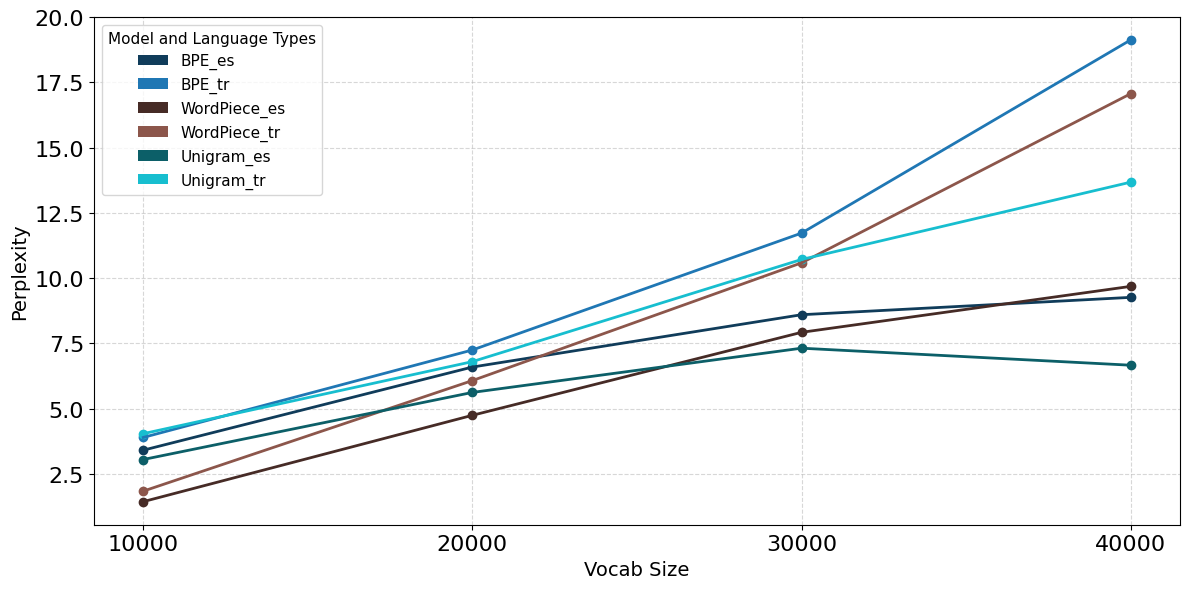

In [20]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))

    perplexity_dict = {}
    for (language, model_name) in color_dict.keys():
        perplexity_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_bpc_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/bpc_{dataset_name}.json')
            with open(results_bpc_path) as f:
                results_dict = json.load(f)

            perplexity_dict[(language, model_name)].append(results_dict['perplexity'])
            
            plt.plot(
            vocab_size,
            results_dict['perplexity'],
            label=f'{model_name}_{language}',
            color=color_dict[(language, model_name)],
            marker='o',
            )

    for (language, model_name) in color_dict.keys():
        for i in range(3):
            plt.plot(
                    [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                    [perplexity_dict[(language, model_name)][i], perplexity_dict[(language, model_name)][i+1]],
                    color=color_dict[(language, model_name)],
                    linestyle='-',
                    linewidth=2,
                    )
    
    plt.xlabel('Vocab Size', fontsize=14)
    #plt.ylabel('Perplexity', fontsize=14)
    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]
    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper left', fontsize=11, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.yticks(fontsize=16)
    plt.xticks(VOCAB_SIZES, fontsize=16)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()


    plt.savefig(f'../figures/perplexity_{dataset_name}.svg')
    plt.show()
            

In [15]:
fig_legend = plt.figure(figsize=(6, 2))  

fig_legend.legend(
    handles=model_patches,
    labels=[patch.get_label() for patch in model_patches],
    loc='center',
    title='Model and Language Types',
    fontsize=11,
    title_fontsize=11, 
)
#fig_legend.axis('off')  

fig_legend.savefig(f'../figures/legend_only.svg', format='svg')
plt.show(fig_legend)  

<Figure size 600x200 with 0 Axes>

### new F1 score (FYI)

Vocab Size: 10000
Model: BPE
F1 0.5-0.6: 916
F1 0.6-0.7: 685
F1 0.7-0.8: 399
F1 0.8-0.9: 106
F1 0.9-1.0: 56
F1 < 0.5: 2162
Model: WordPiece
F1 0.5-0.6: 390
F1 0.6-0.7: 171
F1 0.7-0.8: 74
F1 0.8-0.9: 18
F1 0.9-1.0: 4
F1 < 0.5: 657
Model: Unigram
F1 0.5-0.6: 942
F1 0.6-0.7: 716
F1 0.7-0.8: 421
F1 0.8-0.9: 122
F1 0.9-1.0: 63
F1 < 0.5: 2264


/var/folders/tj/hl1lt9gs7437b5wxt0r22tfc0000gn/T/ipykernel_3145/3265040997.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').reversed()


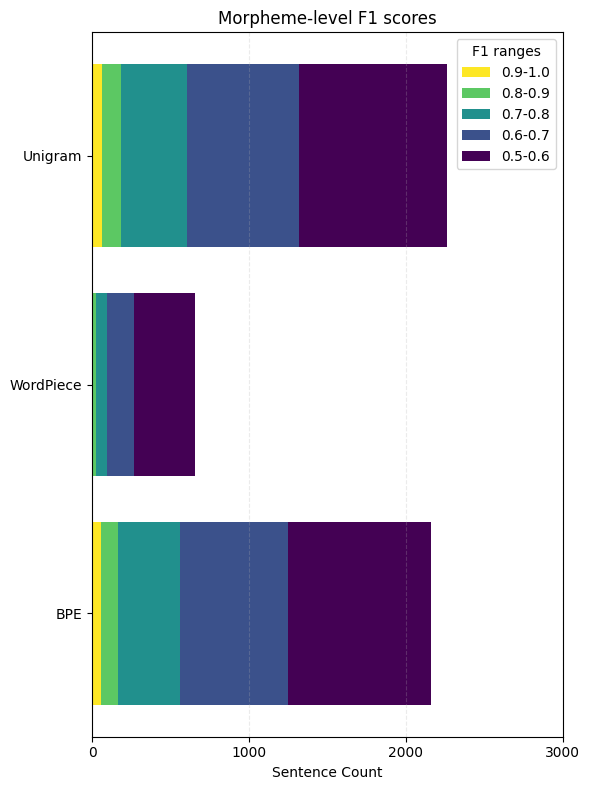

Vocab Size: 40000
Model: BPE
F1 0.5-0.6: 741
F1 0.6-0.7: 1127
F1 0.7-0.8: 1184
F1 0.8-0.9: 565
F1 0.9-1.0: 345
F1 < 0.5: 3962
Model: WordPiece
F1 0.5-0.6: 836
F1 0.6-0.7: 1116
F1 0.7-0.8: 1079
F1 0.8-0.9: 495
F1 0.9-1.0: 274
F1 < 0.5: 3800
Model: Unigram
F1 0.5-0.6: 841
F1 0.6-0.7: 1097
F1 0.7-0.8: 1090
F1 0.8-0.9: 479
F1 0.9-1.0: 250
F1 < 0.5: 3757


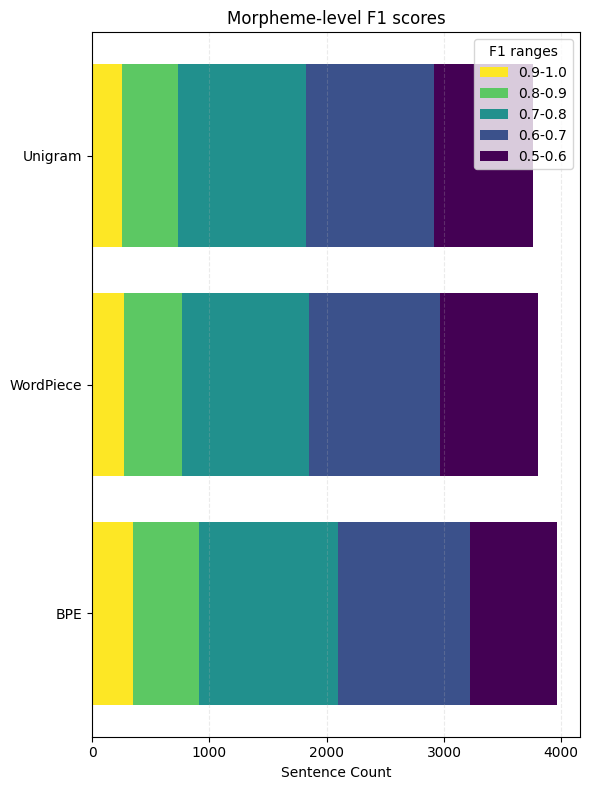

In [317]:
# Create a colormap
cmap = cm.get_cmap('viridis').reversed()
colors = cmap(np.linspace(0, 1, 5)) 

for vocab_size in [10000, 40000]:
    print('================================')
    print(f'Vocab Size: {vocab_size}')
    print('================================')
    fig, ax = plt.subplots(1, 1, figsize=(6, 8))

    f1_score_05 = []
    f1_score_06 = []
    f1_score_07 = []
    f1_score_08 = []
    f1_score_09 = []
    f1_score_05_higher = []

    for model_name in TOKENIZER_MODELS:
        # Load the f1 results
        results_f1_path = os.path.join(results_path, f'tr_{model_name}_vs{vocab_size}/f1_score.json')
        with open(results_f1_path) as f:
            results_dict = json.load(f)
        
        f1_05 = 0
        f1_06 = 0
        f1_07 = 0
        f1_08 = 0
        f1_09 = 0

        for f1_score in results_dict['f1_score']:
            if f1_score > 0.9:
                f1_09 += 1
            elif f1_score > 0.8:
                f1_08 += 1
            elif f1_score > 0.7:
                f1_07 += 1
            elif f1_score > 0.6:
                f1_06 += 1
            elif f1_score > 0.5:
                f1_05 += 1

        f1_05_higher= np.sum([f1_05, f1_06, f1_07, f1_08, f1_09], axis=0)

        f1_score_05.append(f1_05)
        f1_score_06.append(f1_06)
        f1_score_07.append(f1_07)
        f1_score_08.append(f1_08)
        f1_score_09.append(f1_09)
        f1_score_05_higher.append(f1_05_higher)

        

        print(f"Model: {model_name}")
        print("F1 0.5-0.6:", f1_05)
        print("F1 0.6-0.7:", f1_06)
        print("F1 0.7-0.8:", f1_07)
        print("F1 0.8-0.9:", f1_08)
        print("F1 0.9-1.0:", f1_09)
        print("F1 < 0.5:", f1_05_higher)

    x_positions = np.arange(len(TOKENIZER_MODELS))

    # Plot a stacked bar graph in the current subplot
    ax.barh(x_positions, f1_score_09, color=colors[0], label='0.9-1.0')
    ax.barh(x_positions, f1_score_08, left=f1_score_09, color=colors[1], label='0.8-0.9')
    ax.barh(x_positions, f1_score_07, left=np.add(f1_score_09, f1_score_08), color=colors[2], label='0.7-0.8')
    ax.barh(x_positions, f1_score_06, left=np.add(np.add(f1_score_09, f1_score_08), f1_score_07), color=colors[3], label='0.6-0.7')
    ax.barh(x_positions, f1_score_05, left=np.add(np.add(np.add(f1_score_09, f1_score_08), f1_score_07), f1_score_06), color=colors[4], label='0.5-0.6')

    # Add the labels and title
    ax.set_yticks(x_positions)
    ax.set_yticklabels(TOKENIZER_MODELS)
    ax.set_xlabel('Sentence Count')
    ax.set_title('Morpheme-level F1 scores')

    # Add gridlines and set x-ticks every 10
    ax.grid(True, axis='x', linestyle='--', alpha=0.25)  # Gridlines only on the x-axis
    max_f1_total = max(f1_score_05_higher)  # Calculate the maximum value for the x-ticks
    ax.set_xticks(np.arange(0, max_f1_total + 1000, 1000))  # Set x-ticks every 10

    # Add legend for only the first plot
    ax.legend(title='F1 ranges')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Save the figure with subplots
    #plt.savefig('../figures/f1_scores.svg', bbox_inches='tight')

    # Show the figure
    plt.show()
    plt.close